In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib as mpl
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

import argparse
import os

import fsspec
import numpy as np
import pandas as pd
import xarray as xr
import goes2go
import pandas as pd
from tqdm import tqdm

from pyproj import Proj
from scipy.interpolate import make_splrep

In [4]:
ibtracs_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.ALL.list.v04r01.csv'
ibtracs_na_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.NA.list.v04r01.csv'
ibtracs_ep_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.EP.list.v04r01.csv'
ibtracs_wp_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.WP.list.v04r01.csv'
ibtracs_sp_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.SP.list.v04r01.csv'
ibtracs_si_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.SI.list.v04r01.csv'
ibtracs_sa_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.SA.list.v04r01.csv'
ibtracs_ni_file = '/home/users/annaju/eo-data-prep/notebooks/IBTrACs/ibtracs.NI.list.v04r01.csv'

In [5]:
df = pd.read_csv(ibtracs_file)
df_na = pd.read_csv(ibtracs_na_file)
df_ep = pd.read_csv(ibtracs_ep_file)
df_wp = pd.read_csv(ibtracs_wp_file)
df_sp = pd.read_csv(ibtracs_sp_file)
df_si = pd.read_csv(ibtracs_si_file)
df_sa = pd.read_csv(ibtracs_sa_file)
df_ni = pd.read_csv(ibtracs_ni_file)

/tmp/ipykernel_2788387/3797323616.py:1: DtypeWarning: Columns (1,2,8,9,14,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ibtracs_file)
/tmp/ipykernel_2788387/3797323616.py:2: DtypeWarning: Columns (1,2,3,8,9,14,19,20,23,24,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df_na = pd.read_csv(ibtracs_na_file)
/tmp/ipykernel_2788387/3797323616.py:3: DtypeWarning: Columns (1,2,8,9,14,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ep = pd.read_csv(ibtracs_ep_file)
/tmp/ipykernel_2788387/3797323616.py:4: DtypeWarning: Columns (1,2,8,9,14,142,143,144,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wp = pd.read_csv(ibtracs_wp_file)
/tmp/ipykernel_2788387/3797323616.py:5: DtypeWarning: Columns (1,2,8,9,14,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sp = pd.read_csv(ibtracs_sp_file)


### North Atlantic Files

In [191]:
df_na_filtered = df_na[df_na.SEASON.isin([2018, 2019, 2020, 2021, 2022, 2023, 2024])]
df_na_filtered = df_na_filtered[df_na_filtered.NATURE.isin(['TS', 'DS'])]
df_na_filtered = df_na_filtered[df_na_filtered.NAME != 'UNNAMED']
# filter for GOES FOV
df_na_filtered = df_na_filtered[df_na_filtered.LAT.between(-50, 50) & df_na_filtered.LON.between(-125, -25)]

# filter out storms with less than 8 points
grouped = df_na_filtered.groupby('SID')
lengths = grouped.size()
df_na_filtered = df_na_filtered[df_na_filtered.SID.isin(lengths[lengths >= 8].index)]

In [189]:
len(df_na_filtered.SID.unique())

118487    ALBERTO
118488    ALBERTO
118489    ALBERTO
118490    ALBERTO
118491    ALBERTO
           ...   
126834       SARA
126835       SARA
126836       SARA
126837       SARA
126838       SARA
Name: NAME, Length: 6614, dtype: object

In [161]:
df_na_filtered.LAT.min(), df_na_filtered.LAT.max(), df_na_filtered.LON.min(), df_na_filtered.LON.max()

(8.1, 49.8, -124.7, -25.0)

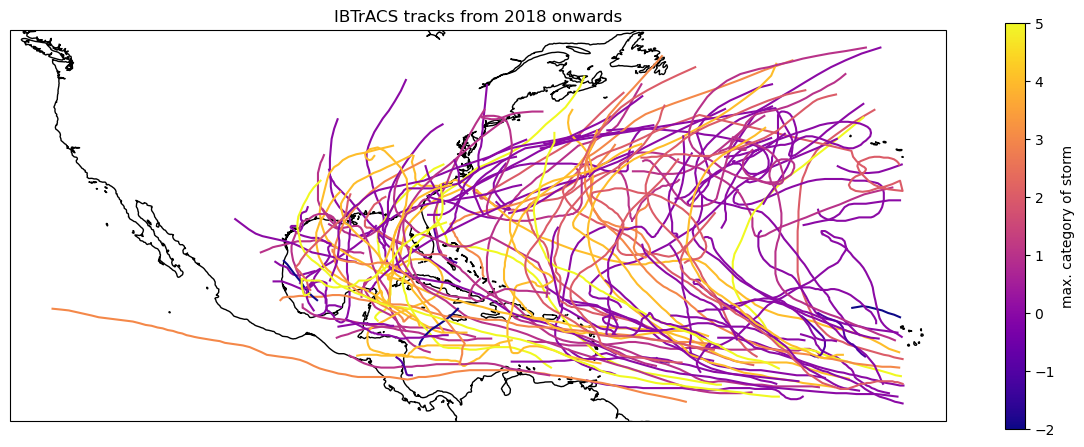

In [162]:
# Plot tracks on map
fig, ax = plt.subplots(figsize=(12, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
grouped = df_na_filtered.groupby('SID')

# plot every track with colour for category
cmap = plt.cm.plasma
norm = mcolors.Normalize(vmin=-2, vmax=5)
for i, (name, group) in enumerate(grouped):
    max_cat = group['USA_SSHS'].max()
    ax.plot(group['LON'], group['LAT'], transform=ccrs.PlateCarree(), label=name, color=cmap(norm(max_cat)))

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable with colorbar
plt.colorbar(sm, ax=ax, label='max. category of storm')
plt.title('IBTrACS tracks from 2018 onwards')

plt.tight_layout()

### Eastern Pacific

In [163]:
df_ep_filtered = df_ep[df_ep.SEASON.isin([2018, 2019, 2020, 2021, 2022, 2023, 2024])]
df_ep_filtered = df_ep_filtered[df_ep_filtered.NATURE.isin(['TS', 'DS'])]
df_ep_filtered = df_ep_filtered[df_ep_filtered.NAME != 'UNNAMED']
# filter for GOES FOV
df_ep_filtered = df_ep_filtered[df_ep_filtered.LAT.between(-50, 50) & df_ep_filtered.LON.between(-125, -25)]

# filter out storms with less than 8 points
grouped = df_ep_filtered.groupby('SID')
lengths = grouped.size()
df_ep_filtered = df_ep_filtered[df_ep_filtered.SID.isin(lengths[lengths >= 8].index)]

In [164]:
len(df_ep_filtered.SID.unique())

121

In [165]:
df_ep_filtered.LAT.min(), df_ep_filtered.LAT.max(), df_ep_filtered.LON.min(), df_ep_filtered.LON.max()

(8.2, 31.4, -125.0, -50.5)

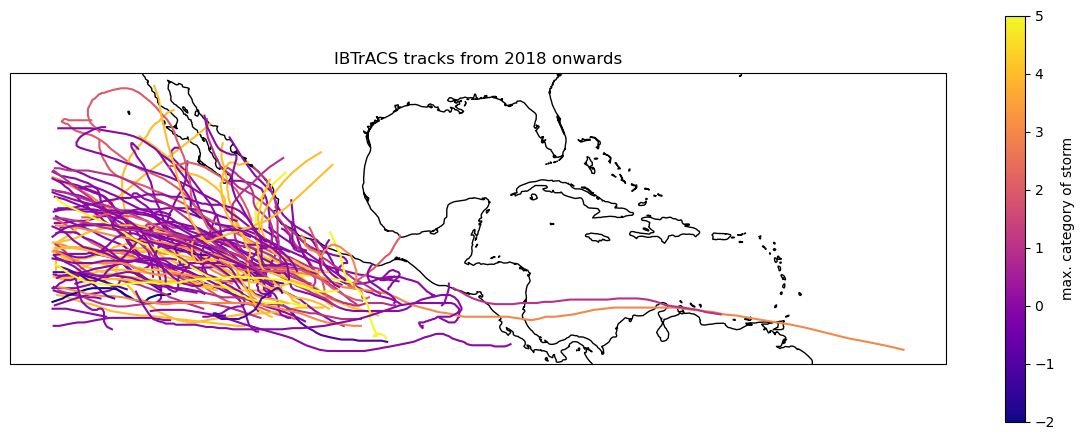

In [166]:
# Plot tracks on map
fig, ax = plt.subplots(figsize=(12, 4.5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
grouped = df_ep_filtered.groupby('SID')

# plot every track with colour for category
cmap = plt.cm.plasma
norm = mcolors.Normalize(vmin=-2, vmax=5)
for i, (name, group) in enumerate(grouped):
    max_cat = group['USA_SSHS'].max()
    ax.plot(group['LON'], group['LAT'], transform=ccrs.PlateCarree(), label=name, color=cmap(norm(max_cat)))

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable with colorbar
plt.colorbar(sm, ax=ax, label='max. category of storm')
plt.title('IBTrACS tracks from 2018 onwards')

plt.tight_layout()

In [168]:
# merge into one dataframe
df_all = pd.concat([df_na_filtered, df_ep_filtered], ignore_index=True)
df_all.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,2018146N19273,2018,25,NaN,GM,ALBERTO,2018-05-28 00:00:00,TS,28.2,-85.8,...,,,,12,70,,,70,7,315
1,2018146N19273,2018,25,NaN,GM,ALBERTO,2018-05-28 03:00:00,TS,28.4,-86.0,...,,,,,,,,,4,335
2,2018146N19273,2018,25,NaN,GM,ALBERTO,2018-05-28 06:00:00,TS,28.6,-86.0,...,,,,,,,,,4,0
3,2018146N19273,2018,25,NaN,GM,ALBERTO,2018-05-28 09:00:00,TS,28.8,-86.0,...,,,,,,,,,5,10
4,2018146N19273,2018,25,NaN,GM,ALBERTO,2018-05-28 12:00:00,TS,29.1,-85.9,...,,,,12,75,75,45,75,6,10


In [171]:
df_all.to_csv('goes_ibtracs.NA-EP.list.v04r01.csv', index=False)

In [183]:
# find total number of days covered by all storms
total_days = df_all.groupby('SID').apply(lambda x: (x['ISO_TIME'].max() - x['ISO_TIME'].min()).days + 1).sum()

print(f"Total number of days covered by all storms: {total_days}")
print(f"Number of unique storms: {len(df_all.SID.unique())}")
print(f"Average days per storm: {total_days / len(df_all.SID.unique()):.1f}")

Total number of days covered by all storms: 1527
Number of unique storms: 254
Average days per storm: 6.0


/tmp/ipykernel_1243023/549307399.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_days = df_all.groupby('SID').apply(lambda x: (x['ISO_TIME'].max() - x['ISO_TIME'].min()).days + 1).sum()


In [185]:
# randomly sample 50 storms
sampled_storms = df_all.SID.unique()
sampled_storms = np.random.choice(sampled_storms, size=10, replace=False)
df_sampled = df_all[df_all.SID.isin(sampled_storms)]

In [186]:
# find total number of days covered by all storms
total_days = sampled_storms.groupby('SID').apply(lambda x: (x['ISO_TIME'].max() - x['ISO_TIME'].min()).days + 1).sum()

print(f"Total number of days covered by all storms: {total_days}")
print(f"Number of unique storms: {len(sampled_storms.SID.unique())}")
print(f"Average days per storm: {total_days / len(sampled_storms.SID.unique()):.1f}")

Total number of days covered by all storms: 274
Number of unique storms: 50
Average days per storm: 5.5


Total number of days covered by all storms: 274
Number of unique storms: 50
Average days per storm: 5.5


/tmp/ipykernel_1243023/2983668113.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_days = df_sampled.groupby('SID').apply(lambda x: (x['ISO_TIME'].max() - x['ISO_TIME'].min()).days + 1).sum()


In [147]:
def get_goes_image(
    timestamp: str,)-> xr.Dataset:
    """
    Get the GOES image for a given timestamp.
    
    Args:
        timestamp (str): The timestamp in ISO format (e.g., '2023-10-01T12:00:00Z').
    
    Returns:
        xr.Dataset: The GOES dataset for the specified timestamp.
    """
    # Download the GOES data for the specified timestamp:
    goes_df = goes2go.goes_timerange(
        start = pd.to_datetime(timestamp), 
        end = pd.to_datetime(timestamp) + pd.Timedelta(minutes=10),
        satellite= 'noaa-goes16',
        download = False, 
        product = 'ABI-L2-MCMIP', 
        domain = 'F'
    )
      # Create filesystem object inside worker process to avoid fork-safety issues
    fs = fsspec.filesystem('s3', anon=True)
    fsspec_caching = {
        "cache_type": "blockcache",  # block cache stores blocks of fixed size and uses eviction using a LRU strategy.
        "block_size": 8 * 1024 * 1024 # size in bytes per block, adjust depends on the file size but the recommended size is in the MB}
    }
    ds = xr.open_dataset(fs.open(goes_df.file[0], **fsspec_caching), engine="h5netcdf")
    return ds

In [150]:
def get_abi_proj(dataset: xr.Dataset) -> Proj:
    """
    Return a pyproj projection from the information contained within an ABI file
    """
    return Proj(
        proj="geos",
        h=dataset.goes_imager_projection.perspective_point_height,
        lon_0=dataset.goes_imager_projection.longitude_of_projection_origin,
        lat_0=dataset.goes_imager_projection.latitude_of_projection_origin,
        sweep=dataset.goes_imager_projection.sweep_angle_axis,
    )


def get_abi_lat_lon(
    dataset: xr.Dataset, dtype: type = float
) -> tuple[np.ndarray, np.ndarray]:
    """
    Returns latitude and longitude for each location in an ABI dataset
    """
    p = get_abi_proj(dataset)
    xx, yy = np.meshgrid(
        (
            dataset.x.data * dataset.goes_imager_projection.perspective_point_height
        ).astype(dtype),
        (
            dataset.y.data * dataset.goes_imager_projection.perspective_point_height
        ).astype(dtype),
    )
    lons, lats = p(xx, yy, inverse=True)
    lons[lons >= 1e30] = np.nan
    lats[lats >= 1e30] = np.nan
    return lats, lons

In [151]:
ds = get_goes_image('2023-10-01 12:00:00')

In [152]:
lats, lons = get_abi_lat_lon(ds)

In [156]:
np.nanmin(lats), np.nanmax(lats), np.nanmin(lons), np.nanmax(lons)

(np.float64(-81.14863073975214),
 np.float64(81.14659212288488),
 np.float64(-156.19352714824865),
 np.float64(6.197302874000297))

In [195]:
test_patch = xr.open_dataset('/home/users/annaju/eo-data-prep/scripts/2023249N12320/2023249N12320_20230910112020_patch.nc')

In [196]:
test_patch

<xarray.Dataset> Size: 134MB
Dimensions:                                 (y: 1024, x: 1024,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2, band: 1)
Coordinates: (12/37)
    t                                       datetime64[ns] 8B ...
  * y                                       (y) float32 4kB 0.09226 ... 0.03497
  * x                                       (x) float32 4kB 0.01145 ... 0.06874
    y_image                                 float32 4B ...
    x_image                                 float32 4B ...
    band_wavelength_C01                     (band) float32 4B ...
    ...                                      ...
    band_id_C11                             (band) int8 1B ...
    band_id_C12                             (band) int8 1B ...
    band_id_C13                             (band) int8 1B ...
    band_id_C14                             (band) int8 1B ...
    band_id_C15                             (band) int8 1B ...
    band_id_C16                             (band) int8 1B ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/124)
    CMI_C01                                 (y, x) float32 4MB ...
    DQF_C01                                 (y, x) float32 4MB ...
    CMI_C02                                 (y, x) float32 4MB ...
    DQF_C02                                 (y, x) float32 4MB ...
    CMI_C03                                 (y, x) float32 4MB ...
    DQF_C03                                 (y, x) float32 4MB ...
    ...                                      ...
    mean_brightness_temperature_C16         float32 4B ...
    std_dev_brightness_temperature_C16      float32 4B ...
    percent_uncorrectable_GRB_errors        float32 4B ...
    percent_uncorrectable_L0_errors         float32 4B ...
    dynamic_algorithm_input_data_container  float32 4B ...
    algorithm_product_version_container     float32 4B ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2023-09-10T11:29:59.8Z
    time_coverage_start:       2023-09-10T11:20:20.6Z
    time_coverage_end:         2023-09-10T11:29:52.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        edc43180-3337-4382-8857-8c603a63300e

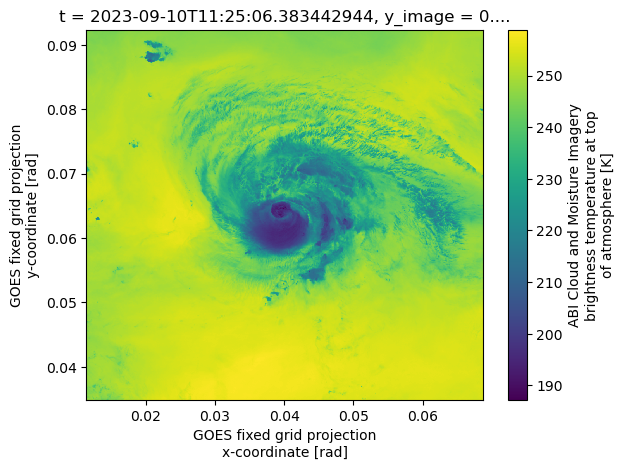

In [197]:
test_patch.CMI_C09.plot()